#Cargando librerias principales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Probabilidades

* Experimento aleatorio: es un experimento que realizado bajo las mismas condiciones puede dar resultados diferentes.
* Suceso elemental: es cada uno de los posibles resultados del experimento.
* Espacio muestral: conjunto ${\Omega}$ formado por todos los sucesos elementales del experimento aleatorio.

Ejemplo:
- Experimento aleatorio: Lanzar una moneda.
- Suceso elemental: caro (C) o Sello(S)
- Espacio muestral: $\Omega$ = {C,S}

In [ ]:
def probabilidad(sample_size, event):
    '''Devuelve la probabilidad de un evento dado el evento y el tamaño de la muestra.
    El evento puede estar compuesto por un solo elemento O varios elementos (es decir,
    una tupla O lista)'''
    
    if isinstance(event, (list, tuple)):
        count = len(event)
    else:
        count = 1
    return count / sample_size


In [ ]:
#Suponiendo que nuestro evento es sacar un 2 en un dado de seis caras
probabilidad(sample_size=6, event=2)

In [ ]:
#Suponiendo que nuestro evento es sacar un 4 y 2 en un dado de seis caras
probabilidad(sample_size=6, event=[4,2])

In [ ]:
#para simplificar asignamos funcion "probabilidada" a "P"
P=probabilidad

¿Cuál es la probabilidad de sacar más de un 5 en un d10 o sacar un número par?

$\large P(A \ \cup \ B) = \frac{n(A) \ + \ n(B) \ - \ n(A \cap B)}{n(S)}$\
$\large P(A \ \cup \ B) = \frac{5 \ + \ 5 \ - \ 3}{10} = \frac{7}{10}$\
$\large P(A \ \cup \ B) = 0.7$

In [ ]:
answer = P(10, [6, 7, 8, 9, 10]) + P(10, [2, 4, 6, 8, 10]) - P(10, [6, 8, 10])
print(answer)


¿Cuál es la probabilidad de sacar una carta roja de un mazo estándar O sacar un Rey?

Como puede imaginar, esto se vuelve problemático a medida que crece el tamaño de nuestra muestra

In [ ]:
#answer = P(52, ['AD', '2D', '3D', '4D', ...]) + P(52, ['KS', 'KC', 'KD', 'KH']) - P(52, ['KD', 'KH'])
#print(answer)

In [ ]:
def probabilidad(sample_size, event=None, event_size=None):
    '''Devuelve la probabilidad de un evento dado el evento y el tamaño de la muestra.
    
    evento: el argumento del evento puede estar compuesto por
    * varios elementos (es decir, una tupla O lista) (que luego se cuentan) O
    * un solo elemento que se equipara internamente a una cuenta de uno
    
    event_size: como alternativa a proporcionar un evento, simplemente puede proporcionar su propio recuento usando
    el argumento event_size:
    * un número entero que representa el número de elementos de un evento.
    
    Solo se debe proporcionar uno de estos dos (evento O event_size).
    '''
        
    if isinstance(event, (list, tuple)):
        count = len(event)
    elif isinstance(event_size, int):
        count = event_size
    else:
        count = 1
    return count / sample_size

# Nuevamente, proporcionemos un alias para nuestra función de probabilidad
P = probabilidad

In [ ]:
# carta roja o rey

answer = P(52, event_size=26) + P(52, event_size=4) - P(52, event_size=2)
print(answer)

In [ ]:
print('P(roja)', P(52, event_size=26))
print('P(rey)', P(52, event_size=4))
print('P(rey rojo)', P(52, event_size=2))


¿Cuál es la probabilidad de sacar una carta roja de un mazo estándar O sacar una figura (Rey, Reina, Jack)?

In [ ]:
answer = P(52, event_size=26) + P(52, event_size=12) - P(52, event_size=6)
print(answer)

In [ ]:
#Si el problema es lo suficientemente simple como para hacer 
#la aritmética en su cabeza, entonces eso también está bien:

# 26 + 12 - 6 = 32

P(52, event_size=32)

## Condicional

Otro nivel de comprensión de la probabilidad es poder evaluar la probabilidad de un evento dada alguna otra condición.

¿Cuál es la probabilidad de que una carta dada sea un rey si sabes que es negra?
¿Cuál es la probabilidad de que saques un 10 si sabes que el número obtenido fue par?

En este caso, creamos un árbol de probabilidad que tiene dos niveles de ramas.

El primer nivel (a la izquierda) muestra la probabilidad de que una carta dada sea Roja o Negra
El segundo nivel (a la derecha) muestra las probabilidades de que una carta sea Rey o No Rey para cada rama del primer nivel.
NOTA: aquí, cada conjunto de ramas de nivel es binario (con solo dos ramas (es decir, rojo / negro)) pero los niveles podrían tener más opciones.

Por ejemplo, los cuadrados de una mesa de ruleta pueden ser rojos, negros y verdes.

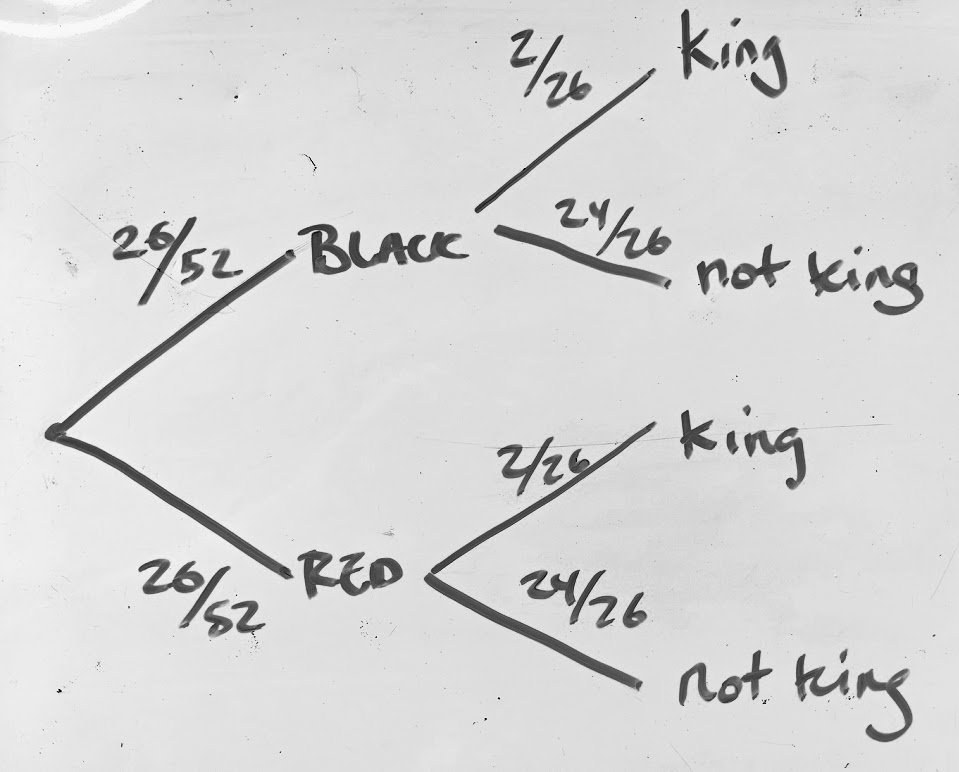

Para resolver la probabilidad total en cualquier rama, multiplicamos la probabilidad del primer nivel de una rama extendida por la probabilidad del segundo nivel de esa rama. Por ejemplo, si queremos determinar la probabilidad de que una carta sea Rey y Negra:

$\Large \frac{26}{52} \times \frac{2}{26} = 0.03846$

Podemos probar esto usando nuestra fórmula de probabilidad:

In [ ]:
P(52, event_size=26) * P(26, event_size=2)


Las otras ramas se desarrollan de manera similar:

Negro y no un rey: $\Large \frac{26}{52} \times \frac{24}{26} = 0.46153$

Rojo y rey: $\Large \frac{26}{52} \times \frac{2}{26} = 0.03846$ \
Rojo y no un rey:$\Large \frac{26}{52} \times \frac{24}{26} = 0.46153$ \
La suma de las probabilidades para cualquier conjunto de ramas es siempre 1.0 (teniendo en cuenta los errores de redondeo).


In [ ]:
round(sum([0.03846, 0.46153, 0.03846, 0.46153]), 3)

## Valor Esperado o Esperanza:
El valor esperado o esperanza de una variable aleatoria discreta indica el valor promedio al que tiende la variable cuando
el numero de ensayos del experimento tiende a infinito. Se define como:

$E(X) = \sum x * f(x)$

$E(X) = \mu$

In [ ]:
# Funcionque calcula expectation 
def calc_Expectation(a, n): 
      
    # la variable prb es para probabilidad
    # de cada elemento que es el mismo para
    # cada elemento
    prb = 1 / n 
      
    # calculando la expectativa general 
    sum = 0
    for i in range(0, n): 
        sum += (a[i] * prb)  
          
    # devolviendo la expectativa como suma
    return float(sum) 
  
  
n = 6; 
a = [ 1.0, 2.0, 3.0,4.0, 5.0, 6.0 ] 
  
# Función para calcular la expectativa
expect = calc_Expectation(a, n) 
  
# Mostrar la expectativa de una matriz dada
print( "Expectativa de matriz E(X) es : ", 
                                 expect ) 


# Graficando Distribuciones

### Histogramas

Una de las mejores maneras de describir una variable es representar los valores que aparecen en el conjunto de datos y el número de veces que aparece cada valor. La representación más común de una distribución es un histograma, que es un gráfico que muestra la frecuencia de cada valor.

In [ ]:
mu, sigma=0,0.2

data= np.random.normal(mu, sigma,1000)

plt.hist(data,10)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

### Función de Masa de Probabilidad

Otra forma de representar a las distribuciones discretas es utilizando su Función de Masa de Probabilidad o FMP, la cual relaciona cada valor con su probabilidad en lugar de su frecuencia como vimos anteriormente. Esta función es normalizada de forma tal que el valor total de probabilidad sea 1. La ventaja que nos ofrece utilizar la FMP es que podemos comparar dos distribuciones sin necesidad de ser confundidos por las diferencias en el tamaño de las muestras. **Funciona bien si el número de valores es pequeño**.

In [ ]:
n,p=30,0.4 #parametros de forma de distribucion bonomial
n_1, p_1=20, 0.3

x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))

#Funcion de masa de probabilidad
fmp=stats.binom.pmf(x,n,p)
fmp_1=stats.binom.pmf(x_1,n_1,p_1)

plt.plot(x,fmp,'--')
plt.plot(x_1,fmp_1)

plt.vlines(x,0,fmp)
plt.vlines(x_1,0,fmp_1,alpha=0.5,colors='g')

plt.title('Fncion de masa de probabilidiad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Funcion de Distribucion Acumulada

Si queremos evitar los problemas que se generan con FMP cuando el número de valores es muy grande, podemos recurrir a utilizar la Función de Distribución Acumulada o FDA, para representar a nuestras distribuciones, tanto discretas como continuas. Esta función relaciona los valores con su correspondiente percentil

In [ ]:

x_1=np.linspace(stats.norm(10,1.2).ppf(0.01),
                stats.norm(10,1.2).ppf(0.99),100)
                
fda_binom=stats.binom.cdf(x,n,p)
fda_normal=stats.norm(10,1.2).cdf(x_1)

plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1,fda_normal,label='FDA normal')
plt.title('Funcion de distribucion acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=0)
plt.show()

### Función de Densidad de Probabilidad

el equivalente a la FMP para distribuciones continuas es la Función de Densidad de Probabilidad o FDP. Esta función es la derivada de la Función de Distribución Acumulada.

In [ ]:
FDP_normal = stats.norm(10, 1.2).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# Distribuciones de Probabilidad Discreta

La probabilidad de distribución de una variable aleatoria $X$ describe como las probabilidades son asignadas para cada resultado de la variable aleatoria

La probabilidad de cada resultado es descrito por una funcion de probabilidad (densidad) denotado como $P(x)$.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('v_discreta.xlsx')

In [ ]:
dado_df = df.query('flag == "dado" ')[['x','P(x)']]
dado_df

¿ Cual sería la probabilidad de obtener un 2 o 5 en un lanzamiento? 

x = 2,5

**P(x) = 0.166667 + 0.166667 = 0.333334**

Condiciones para probabilidades discretas:
1. 0 <= P(x) <= 1
2. $\sum$ P(x) = 1

Supongamos que realizamos una encuesta para medir la satisfaccion del cliente respecto a uno de nuestros servicios siendo
teniendo como escala (1 = muy insatisfecho, 2 = insatisfecho, 3 = neutral, 4 = satisfecho, 5 = muy satisfecho). ¿Cual seria
el valor esperado o promedio?

In [ ]:
satisfaccion_df = df.query('flag == "satisfaccion" ')[['x','Count','P(x)', 'xP(x)']]
satisfaccion_df

In [ ]:
expected_value = satisfaccion_df['xP(x)'].sum()
print(f'El valor esperado seria: {expected_value}')

## Varianza de una variable aleatoria discreta

Podemos usar la varianza y desviacion estandar de una variable aleatoria discreta para ver que tan dispersa es con respecto a su media.

La formula es la siguiente: 

$Var(x) = \sum (x-\mu)^2 * P(x)$

Por ejemplo analicemos la varianza cuando lanzamos un dado.

In [ ]:
print('Tenemos el cuadro paso a paso como calculamos la varianza')
var_dado_df = df.query('flag == "dado" ')[['x','P(x)','E(x)', 'x-E(x)', '(x-E(x))^2', '((x-E(x))^2) * P(x)']]
var_dado_df

In [ ]:
var_dado_df['P(x)'].plot(kind="bar")
plt.show()

In [ ]:
var = var_dado_df['((x-E(x))^2) * P(x)'].sum()
sd = np.power(var,0.5)
print(f'La varianza es de: {var} ')
print(f'La desviacion estandar es de: {sd}')
print('\nSomos capaces de afirmar que los 4/6 o 2/3 o 67% de los resultados estan entre +1 o -1 desviacion estandar con respecto de la media')

## Distribucion Binomial

Un experimento binomial, presenta las siguientes caracteristicas:

1. El proceso consiste en una secuencia de $"n"$ experimentos.
2. Solo se puede obtener dos resultados (exito o fracaso) en cada prueba.
3. La probabilidad de exito es denotada por $"p"$ y la probabilidad de fracaso es $q = 1-p$.
4. Los experimentos son independientes, el resultado de la prueba anterior no influye sobre el siguiente.

En resumen si $X$ es una variable aleatoria que mide el numer de "exitos" y se realizan $"n"$ experimentos de Bernoulli independientes entre si, diremos que X se distribuye como una Binomial con parametros $n$ y $p$.

<center> $\large X$ ~ $\large B_{(n,p)}$ </center>

El dominio de X sera: {1,2,3,4,5,6,....n}

La funcion de densidad o probabilidad será: $\large f(k) = C_{(n,k)} * p^{k} * (1-p)^{(n-k)}$

Esperanza o valor esperado: $\large E(X) = n * p$

Varianza: $\large V(X) = n*p*q$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import binom

In [ ]:
n = 7
p = 0.4
mean, var, skew, kurt = binom.stats(n, p, moments = 'mvsk')

x = np.arange(0,7)
print('Probability: ', binom.pmf(x, n, p))
print('Cumulative: ', binom.cdf(x,n,p))

plt.figure(1, figsize = (10,4))
plt.subplot(121)
plt.plot(x, binom.pmf(x, n, p), 'bo', ms = 8)
plt.vlines(x, 0, binom.pmf(x,n,p), color = 'b', lw=4, alpha = 0.5)
plt.title("Funcion de densidad de B(7, 0.4)")

plt.subplot(122)
plt.plot(x, binom.cdf(x, n, p), 'bo', ms = 8)
plt.title("Funcion de distribucion de B(7, 0.4)")

plt.show()

## Ejemplo:
Un empleado esta desarrollando un producto con una tasa de  error del 20%. Si selecciona 5 productos aleatorios al final de la linea de ensamblaje. ¿Cual es la probabilidad de tener uno defectuoso?

In [ ]:
n = 5
p = 0.2 
mean, var, skew, kurt = binom.stats(n, p, moments = 'mvsk')
x = np.arange(0,5)
print('Las probabilidades son:', binom.pmf(x, n, p))
print('La media es: ', mean)
print('La desviacion estandar es: ', np.power(var,0.5))

plt.figure(1, figsize = (10,4))
plt.subplot(121)
plt.plot(x, binom.pmf(x, n, p), 'bo', ms = 8)
plt.vlines(x, 0, binom.pmf(x,n,p), color = 'b', lw=4, alpha = 0.5)
plt.title("Funcion de densidad de B(5, 0.2)")

plt.subplot(122)
plt.plot(x, binom.cdf(x, n, p), 'bo', ms = 8)
plt.title("Funcion de distribucion de B(5, 0.2)")

print('\n Según el gráfico vemos que la probabilidad de obtener al menos un equipo defectuoso es de 0.4096.')

## Distribucion de Poisson 

Se enfoca sobre un numero discreto de eventos/experimentos en un intervalo especifico o continuo (tiempo, distancia, tamaño, etc).

$\large P(X) =$ $\LARGE \frac{\lambda^{x} * e^{-\lambda}}{x!}$

## Caracteristicas de la Distribucion

1. Resultado (outcome) discreto (x = 1,2,3,4,...)
2. El numero de eventos en cada intervalo puede tener un rango de 0 a infinito (teoricamente).
3. Describe la distribucion de eventos poco frecuentes
4. Cada evento es independiente de los demas eventos.
5. Describe eventos discreto sobre un intervalo (tiempo, distancia, etc).
6. El valor esperado E(X) será asumido como constante durante el experimento.

## Ejemplo 1:
Un banco esta interesado en estudiar el numero de personas que usa ATM's localizados fuera de sus oficinas por la noche.

En promedio 1.6 clientes utilizan los ATM's cada 10 minutos entre las 9 y 12 de la noche. Con esta información puede indicarnos:

1. ¿Cual es lambda para este problema?
2. ¿Cual es la probabilidad que exactamente 3 clientes usen los ATM's en un intervalo de 10 minutos?
3. ¿Cual es la probabilidad que 3 o menos clientes usen lso ATM's en el mismo intervalo?

In [ ]:
plt.figure(1, figsize=(15,4))

_lambda = 1.6
mean, var, skew, kurt = poisson.stats(_lambda, moments='mvsk')
print('La media es: ',mean)
print('La varianza es: ', var)
print('El sesgo es: ', skew)
print('La curtosis es:', kurt)

x = np.arange(0,15)
pmf = poisson.pmf(x,_lambda)
cdf = poisson.cdf(x,_lambda)

plt.subplot(121)
plt.bar(x,pmf)
plt.xlabel('# Clientes')
plt.ylabel('Probabilidad')
plt.title('Funcion de Probabilidad')

plt.subplot(122)
plt.scatter(x,cdf)
plt.xlabel('# Clientes')
plt.ylabel('Probabilidad')
plt.title('Funcion de Distribucion')

plt.show()

## Distribucion de Bernoulli 



>$ p(r;p) = \left \{ 
\begin{matrix} 
1-p=q & \mbox{si }\mbox{ r=0 (fracaso)}
\\ p & \mbox{si }\mbox{ r=1 (éxito)}
\end{matrix}\right.  $

donde:
a y b  no son por lo general importantes porque no afectan el valor de las integralessi de $f(x)dx$ sobre el intervalo.
Hay muchos ejemplos de distribución de Bernoulli, como si va a llover mañana o no, donde la lluvia denota éxito y la ausencia de lluvia denota fracaso y Ganar (éxito) o perder (fracaso) el juego.


Una distribución de Bernoulli tiene solo dos resultados posibles, a saber, 1 (éxito) y 0 (fracaso), y una única prueba, por ejemplo, un lanzamiento de moneda.
La distribución de Bernoulli es un caso especial de la distribución binomial donde se realiza un solo ensayo (n = 1). El argumento del tamaño decide el número de veces que se repiten los ensayos.
Generación de la distribución de Bernoulli usando el método bernoulli.rvs () del módulo scipy.stats y trazando el histograma de la distribución usando distplot () de la biblioteca seaborn

In [ ]:
from scipy import stats
import seaborn as sns
# Graficando Bernoulli
p =  0.5 # parametro de forma 
bernoulli = stats.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

## Ejemplo:

In [ ]:
bernoulli_dist =stats.bernoulli.rvs(p=0.8,size=10000)

bernoulli_dist_plot = sns.distplot(bernoulli_dist ,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

bernoulli_dist_plot.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

# **Distribuciones Continuas**

## Distribución de Normal (Distribucióón de Gauss)

>$p(x;\mu, \sigma)=\frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^2}$

donde:

*   **x** es el número de ocurrencias del evento o fenómeno ((*x $\in \mathbb R$).
*   **$\mu$** es la media (también puede ser la mediana, la moda o el valor esperado, según aplique) 
*   **$\sigma$** es la desviación típica [estándar es un anglicismo]
*   **$\sigma^2$** es la varianza.

In [ ]:


# Graficando Normal
mu, sigma = 0, 0.2 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Normal')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()



In [ ]:

# histograma
aleatorios = normal.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Normal')
plt.show()



## Ejemplo:


El peso medio de un paquete de cereales para el desayuno matutino es de 0,295 kg con una desviación estándar de 0,025 kg. El peso variable aleatorio del paquete sigue una distribución normal.

a) ¿Cuál es la probabilidad de que el paquete pese menos de 0.280 kg?

b) ¿Cuál es la probabilidad de que el paquete pese más de 0.350 kg?

c) ¿Cuál es la probabilidad de que el paquete pese entre 0,260 kg y 0,340 kg?

In [ ]:
# Para la primera pregunta, calcule el valor z
z=(0.28-0.295)/0.025
# Utilice el valor z calculado para calcular la probabilidad 
# o el área bajo la curva a la izquierda de este valor z
stats.norm.cdf(-0.6)

In [ ]:
# Para la segunda pregunta, calcularemos la puntuación z
z=(0.35-0.295)/0.025
# Utilice el valor z calculado para calcular la probabilidad
# o el área bajo la curva a la derecha de este valor z
1 - stats.norm.cdf(2.2)

In [ ]:
#Para la tercera pregunta, calcularemos la puntuación z de ambos pesos.
z1 = (0.26-0.295)/0.025
z2 = (0.34-0.295)/0.025

# Utilice los valores z calculados para calcular 
# la probabilidad o el área bajo la curva entre los dos valores z
stats.norm.cdf(z2) - stats.norm.cdf(z1)

## Distribución Uniforme

>$f(x;a,b)=\frac{1}{b-a}$, para $a≤x≤b$

Su función de distribución esta entonces dada por:

>$ p(x;a,b) = \left \{ 
\begin{matrix} 
0 & \mbox{si }\mbox{ x≤a}
\\ \frac{x-a}{b-a} & \mbox{si }\mbox{ a≤x≤b}
\\1 & \mbox{si }\mbox{ b≤x}
\end{matrix}\right.  $

donde:
a y b  no son por lo general importantes porque no afectan el valor de las integrales de $f(x)dx$ sobre el intervalo


In [ ]:
# Graficando Uniforme
uniforme = stats.uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [ ]:
# histograma
aleatorios = uniforme.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Uniforme')
plt.show()

## Ejemplo:

In [ ]:
n = 100
width = 1 
height = 1
    
x = np.random.uniform(0,width,n)
y = np.random.uniform(0,height,n)
    
plt.scatter(x,y,color='black')

## Distribucion Exponencial


>$p(x;\alpha)=\frac{1}{\alpha }e^{\frac{-x}{a}}$

En dónde tanto la variable x como el parámetro α son números reales positivos. La Distribución Exponencial tiene bastantes aplicaciones, tales como la desintegración de un átomo radioactivo o el tiempo entre eventos en un proceso de Poisson donde los acontecimientos suceden a una velocidad constante.

In [ ]:
# Graficando Exponencial
exponencial = stats.expon()
x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)
fp = exponencial.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [ ]:

# histograma
aleatorios = exponencial.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Exponencial')
plt.show()

## Distribución Weibull

La distribución Weibull se utiliza frecuentemente para modelar el tiempo hasta que ocurra una falla. Una variable aleatoria continua X sigue una distribución Weibull si su función de densidad de probabilidad está dada por:
$$f(x)=\frac{\beta}{\delta}(\frac{x}{\delta})^{\beta-1}e^{(\frac{-x\beta}{\delta})},x>0$$

Los parámetros $\beta$ y $\delta$ son positivos y cuando $\beta$ = 1, la distribución de Weibull es idéntica a la distribución exponencial. La probabilidadde que X tome un valor menor que una constante k está dada por:

$$P(X<k)=1-e^{\frac{k}{\delta}\beta}$$

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(1,100.)/50.
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

In [ ]:
count, bins, ignored = plt.hist(np.random.weibull(5.,1000))
x = np.arange(1,100.)/50.
scale = count.max()/weib(x, 1., 5.).max()
plt.plot(x, weib(x, 1., 5.)*scale)
plt.show()

# Distribución Chi cuadrado

>$p(x;\mu, \sigma)=\frac{1}{x\sigma \sqrt{2\pi}}e^{\frac{-1}{2}(\frac{\ln x-\mu}{\sigma})^2}$

donde:

*   **x** es el número de ocurrencias del evento o fenómeno (x $\in \mathbb R, x>0$).
*   **$\mu$** es la media
*   **$\sigma$** es la desviación típica [estándar es un anglicismo]
*   **$\sigma^2$** es la varianza.

In [ ]:
# Graficando Chi cuadrado
df = 34 # parametro de forma.
chi2 = stats.chi2(df)
x = np.linspace(chi2.ppf(0.01),
                chi2.ppf(0.99), 100)
fp = chi2.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución Chi cuadrado')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()



In [ ]:
# histograma
aleatorios = chi2.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Chi cuadrado')
plt.show()

# Distribucion T-student

En dónde la variable t es un número real y el parámetro n es un número entero positivo. La Distribución t de Student es utilizada para probar si la diferencia entre las medias de dos muestras de observaciones es estadísticamente significativa. Por ejemplo, las alturas de una muestra aleatoria de los jugadores de baloncesto podría compararse con las alturas de una muestra aleatoria de jugadores de fútbol; esta distribución nos podría ayudar a determinar si un grupo es significativamente más alto que el otro.

In [ ]:

df = 50 # parametro de forma.
t = stats.t(df)
x = np.linspace(t.ppf(0.01),
                t.ppf(0.99), 100)
fp = t.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('Distribución t de Student')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [ ]:

# histograma
aleatorios = t.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma t de Student')
plt.show()